In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

/Users/bipinkb/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Interactive shell for python

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import the Data and understand 

In [3]:
# Import the Titanic Data set

titanic = pd.read_excel('/Users/bipinkb/Desktop/titanic.xlsx')

In [4]:
#Glance through the data

titanic.head()
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Understand different elements in the data

titanic.info()

# There are three differnet data types in this data set Integer, Float and Object
# There are missing values in Age, Cabin and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Total number of missing values in each variable

titanic.isnull().sum()

#Why does Cabin have so many missing values? Because only the 1st class folks usually get a cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing Value Treatment

In [7]:
#Missing value treatment for Cabin

titanic1=titanic.fillna({'Cabin':'missing'})
titanic1

#As cabin is not a very significant varaible in the analysis we just fill it with "missing" and shall drop later

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,missing,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,missing,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#Understanding the mode of Embarked column

titanic['Embarked'].mode()

0    S
dtype: object

In [9]:
#Understanding the mean, median and mode for "Age" variable 

titanic['Age'].median()
titanic['Age'].mean()
titanic['Age'].mode()

28.0

29.69911764705882

0    24.0
dtype: float64

### Using mode imputatioin to treat "Age" and "Embarked" columns

In [10]:
#Age Missing value treatment
titanic1['Age']=titanic1['Age'].fillna(titanic1['Age'].mode()[0])
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Embarked Missing value treatment
titanic1['Embarked']=titanic1['Embarked'].fillna(titanic1['Embarked'].mode()[0])
titanic1.info()

#All the missing values are treated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dummy Coding the Object variables

In [12]:
#Skcit learn doesn't encourage object variables so better to use "int" or "float" data type

for x in titanic1.columns:
    if titanic1[x].dtype=='object':
        titanic1[x]=pd.Categorical(titanic1[x]).codes

titanic1.info()

#All the object variables are dummy coded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


### Droping the columns

In [13]:
#Dropping the below columns as they are unique and won't help in the further steps
titanic1=titanic1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [14]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


### Size of Survived vs Non-survived

In [15]:
#Number of people who survived and did not survive using Groupby

titanic1.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

### Import Sklearn packages for Machine learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression

## Logistic Regression

### Step1: Create Features and Labels

In [17]:
#Seperating the Target variable and features. 
#"x" represents the features and "y" represents the target variables

x=titanic1.drop(['Survived'],axis=1,inplace=False)
y=titanic1['Survived']
x.shape
y.shape
x.info()
y.sample(2)

(891, 7)

(891,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 36.7 KB


255    1
259    1
Name: Survived, dtype: int64

### Step2: Split into Test and Train

In [18]:
#Split x and y into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(712, 7)

(179, 7)

(712,)

(179,)

### Step3: Create the Instant of the Logistic Regression Model

In [19]:
log = LogisticRegression()

### Step4: Fit the Model to the Training set

In [20]:
log.fit(x_train,y_train)

/Users/bipinkb/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Step5: Prediction on the Test Data

In [21]:
predicted=log.predict(x_test)
predicted

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

### Step6: Model Evaluation Performance

In [22]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.79      0.69      0.74        72

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Analysing the Model Performance

#### Precision

The model is able to predict the non-survivors 81% of the times

The model is able to predict the survivors 79% of the times

#### Recall

The model is able to detect the non-survivors 81% of the times

The model is able to detect the survivors 74% of the times

#### Accuracy

The model has an accuracy of 80%

### Evaluate using Confusion Matrix

In [23]:
df_confusion=metrics.confusion_matrix(y_test,predicted)
df_confusion

array([[94, 13],
       [22, 50]])

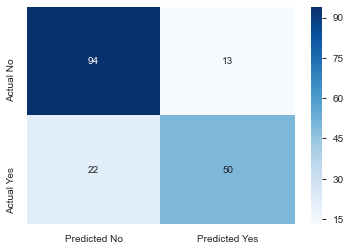

In [24]:
# Visulaize the confusion Matrix

sns.heatmap(df_confusion,cmap='Blues',xticklabels=['Predicted No','Predicted Yes'],yticklabels=['Actual No','Actual Yes'],
           annot=True, fmt='d')


### Probabilty of classes and predicted Class

In [53]:
#Predicted Class
predicted_prob=log.predict_proba(x_test)
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_classes_df=pd.DataFrame(predicted)

#Actual Class
y_actual_df=pd.DataFrame(y_test.values)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df,y_actual_df],axis=1)
predicted_df.columns=['Prob_0','Prob_1','Predicted Class','Actual Class']
predicted_df.head(5)

,Prob_0,Prob_1,Predicted Class,Actual Class
0,0.033027,0.966973,1,0
1,0.633039,0.366961,0,0
2,0.939264,0.060736,0,0
3,0.508726,0.491274,0,0
4,0.813198,0.186802,0,1


In [26]:
df=pd.DataFrame({'Predicted':predicted})

In [43]:
#Renaming the Column

y_test=y_test.rename("Survived_actual")
y_test.head()

0    0
1    0
2    0
3    0
4    1
Name: Survived_actual, dtype: int64

In [47]:
#Dropping index
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

#Concatinating the data to export
final=pd.concat([x_test,y_test,df],axis=1)

In [48]:
#Concatinated data with predicted results
final.head()
final.info()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_actual,Predicted
0,1,0,2.0,1,2,151.5500,2,0,1
1,3,0,16.0,5,2,46.9000,2,0,0
2,3,1,51.0,0,0,7.0542,2,0,0
3,3,0,29.0,0,4,21.0750,2,0,0
4,2,1,34.0,0,0,13.0000,2,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           179 non-null    int64  
 1   Sex              179 non-null    int8   
 2   Age              179 non-null    float64
 3   SibSp            179 non-null    int64  
 4   Parch            179 non-null    int64  
 5   Fare             179 non-null    float64
 6   Embarked         179 non-null    int8   
 7   Survived_actual  179 non-null    int64  
 8   Predicted        179 non-null    int64  
dtypes: float64(2), int64(5), int8(2)
memory usage: 10.3 KB


In [52]:
#Export to Excel

#final.to_excel('/Users/bipinkb/Desktop/tita')

final.to_excel("/Users/bipinkb/Desktop/output.xlsx") 